<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction


**What?** Linear vs. quantile regression



# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create dataset

In [3]:
y = np.arange(1,25, 0.25)
# linear relationship with contant variance of residual
x1 = y.copy() + np.random.randn(96)

In [4]:
# non contant variance with residuals 
x2 = y.copy()
y2 = x2 + np.concatenate((np.random.randn(20)*0.5,
                                np.random.randn(20)*1, 
                                np.random.randn(20)*4, 
                               np.random.randn(20)*6, 
                               np.random.randn(16)*8), axis=0)

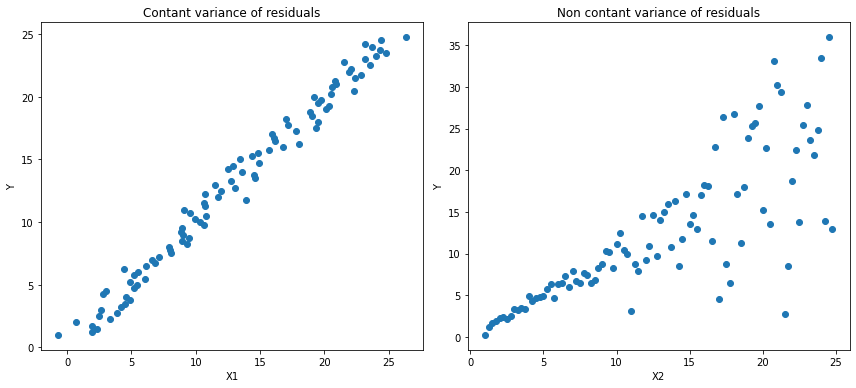

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2 , figsize = (12,5.5) )

ax1.plot(x1, y, 'o')
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.set_title('Contant variance of residuals')

ax2.plot(x2, y2, 'o')
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.set_title('Non contant variance of residuals')

fig.tight_layout()

# Linear regression

In [6]:
lr = LinearRegression()
lr.fit(x1.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

In [7]:
lr2 = LinearRegression()
lr2.fit(x2.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

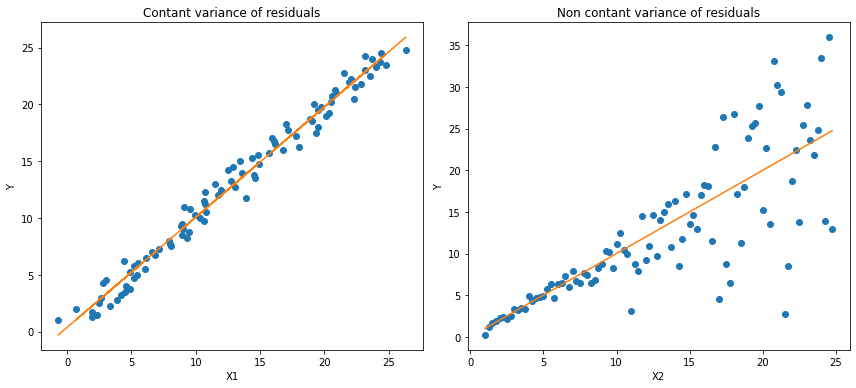

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2 , figsize = (12,5.5) )

ax1.plot(x1, y, 'o')
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.set_title('Contant variance of residuals')
ax1.plot(x1, lr.predict(x1.reshape(-1,1)))

ax2.plot(x2, y2, 'o')
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.set_title('Non contant variance of residuals')
ax2.plot(x2, lr2.predict(x2.reshape(-1,1)))

fig.tight_layout()

# Quantile regression

In [9]:
data = pd.DataFrame(data={'X': x2, 'Y':y2})

In [10]:
mod = smf.quantreg('Y ~ X', data)
res = mod.fit(q=.5)

quantiles  = np.array((0.05, 0.95))
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['X']] + \
            res.conf_int().loc['X'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('Y ~ X', data).fit()
ols_ci = ols.conf_int().loc['X'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['X'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q         a         b        lb        ub
0  0.05  0.828733  0.319468  0.130713  0.508224
1  0.95 -0.639910  1.494381  1.326048  1.662714
{'a': -0.14718198623284495, 'b': 0.9840010947066546, 'lb': 0.8329859585204455, 'ub': 1.1350162308928637}


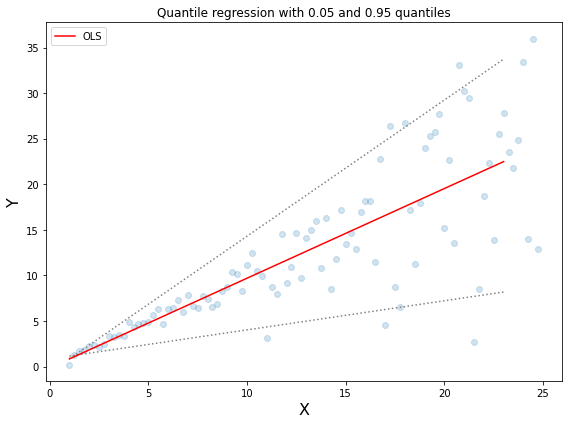

In [11]:
xn = np.arange(data.X.min(), data.X.max(), 2)
get_y = lambda a, b: a + b * xn

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    yn = get_y(models.a[i], models.b[i])
    ax.plot(xn, yn, linestyle='dotted', color='grey')

yn = get_y(ols['a'], ols['b'])

ax.plot(xn, yn, color='red', label='OLS')

ax.scatter(data.X, data.Y, alpha=.2)
legend = ax.legend()
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_title('Quantile regression with 0.05 and 0.95 quantiles')

fig.tight_layout()

# References


- [Reference article](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)<br>
- [Reference code](https://github.com/groverpr/Machine-Learning/blob/master/notebooks/09_Quantile_Regression.ipynb)<br> 

